In [40]:
import os

texts = []
labels = []

base_path = "news_dataset"

for category in os.listdir(base_path):
    category_path = os.path.join(base_path, category)
    
    if os.path.isdir(category_path):
        # go inside the inner folder with same name
        inner_path = os.path.join(category_path, category)
        
        if os.path.isdir(inner_path):
            for file in os.listdir(inner_path):
                if file.endswith(".txt"):
                    file_path = os.path.join(inner_path, file)
                    
                    with open(file_path, "r", encoding="utf-8") as f:
                        texts.append(f.read())
                        labels.append(category)


In [41]:
print("Total documents:", len(texts))
print("Categories:", set(labels))



Total documents: 10000
Categories: {'Prabas', 'Desh', 'Viswa', 'Manoranjan', 'Swasthya', 'SuchanaPrabidhi', 'Bichar', 'Sahitya', 'ArthaBanijya', 'Khelkud'}


In [42]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report
import joblib

In [43]:

def clean_nepali(text):
    text = text.lower()
    text = re.sub(r"[^\u0900-\u097F\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

texts = [clean_nepali(t) for t in texts]


In [44]:
X = texts
y = labels


In [45]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [46]:
from sklearn.pipeline import make_pipeline
nb_model = make_pipeline(
    TfidfVectorizer(
        max_features=40000,
        ngram_range=(1,2),
        min_df=3
    ),
    ComplementNB(alpha=0.1)
)

In [47]:
from sklearn.metrics import classification_report, accuracy_score

nb_model.fit(X_train, y_train)
y_preds = nb_model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, y_preds)*100:.2f}%')
print(classification_report(y_test, y_preds))


Accuracy = 81.50%
                 precision    recall  f1-score   support

   ArthaBanijya       0.80      0.85      0.83       200
         Bichar       0.73      0.93      0.82       200
           Desh       0.85      0.64      0.73       200
        Khelkud       0.93      0.99      0.96       200
     Manoranjan       0.72      0.69      0.70       200
         Prabas       0.86      0.69      0.77       200
        Sahitya       0.69      0.71      0.70       200
SuchanaPrabidhi       0.89      0.93      0.91       200
       Swasthya       0.84      0.95      0.89       200
          Viswa       0.88      0.78      0.82       200

       accuracy                           0.81      2000
      macro avg       0.82      0.82      0.81      2000
   weighted avg       0.82      0.81      0.81      2000



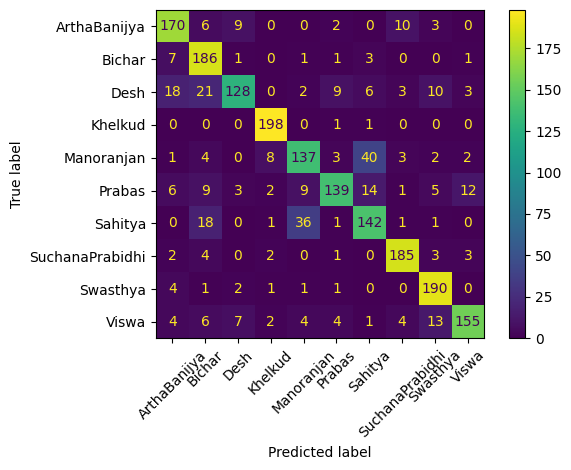

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_preds, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=nb_model.classes_
)
disp.plot(xticks_rotation=45)
plt.tight_layout()
plt.savefig("cm.png")
plt.show()



In [49]:
texts = [
    "नेपालले आज क्रिकेटमा ऐतिहासिक जित हासिल गरेको छ",
    "सरकारले नयाँ आर्थिक नीति सार्वजनिक गरेको छ"
]

predictions = nb_model.predict(texts)

for text, prediction in zip(texts, predictions):
    print(f"Text: {text}")
    print(f"Predicted Category: {prediction}\n")


Text: नेपालले आज क्रिकेटमा ऐतिहासिक जित हासिल गरेको छ
Predicted Category: Bichar

Text: सरकारले नयाँ आर्थिक नीति सार्वजनिक गरेको छ
Predicted Category: ArthaBanijya



In [50]:


joblib.dump(nb_model, "nepali_news_nb_model.joblib")
print("Model saved successfully")


Model saved successfully


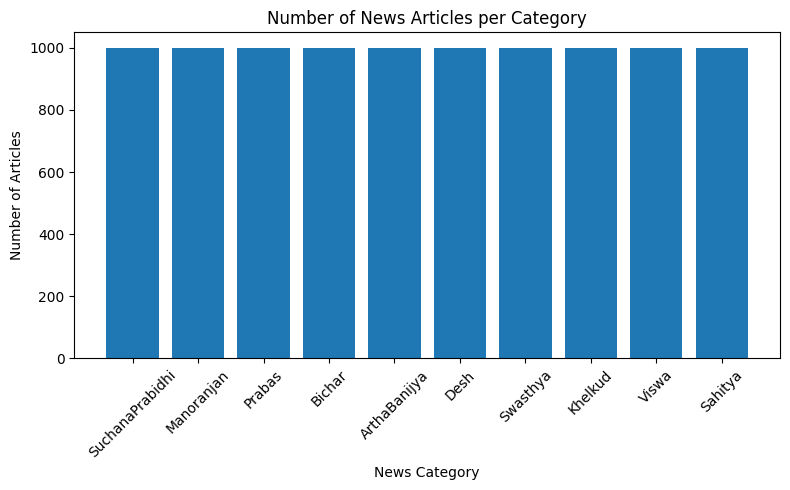

In [51]:
from collections import Counter

label_counts = Counter(labels)

plt.figure(figsize=(8,5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("News Category")
plt.ylabel("Number of Articles")
plt.title("Number of News Articles per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bar.png")
plt.show()
